# BHB formation channels with gaussian mixtures

Tasks
1. Load this file (np.load) and complete a quick exploration of the data. How many modes do you think you see?
2. We'll use sklearn.mixture.GaussianMixture. You first need to define the model (instance of a class), and then train it on the data using the fit method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.
3. Complete the fit 10 times with many Gaussians.
4. For each of this fits, compute the AIC (easy! It's an attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?
5. Plot the preferred solution on top of the input data. You should get a very nice fit!

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities')
from Utilities import plot_settings

In [25]:
data = np.load(r'C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Exam\Data\formationchannels.npy')

Text(0, 0.5, 'Data value')

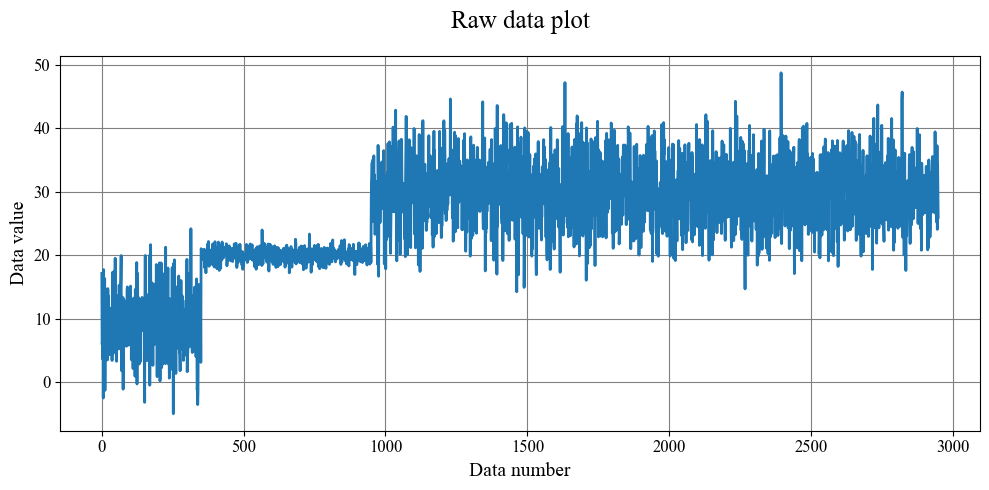

In [27]:
plt.plot(data.T[0])
plt.title('Raw data plot')
plt.xlabel('Data number')
plt.ylabel('Data value')

Probably this can be called out as cheating, but it is cristal clear from the upper plot that data vary around a mean value of 10 with a big sigma, then around 20 with a small sigma, then around 30 with a bigger sigma. I expect the algorithm to return 3 as the best number of modes. Let's pretend not to have seen this.

Text(0, 0.5, 'Frequencies')

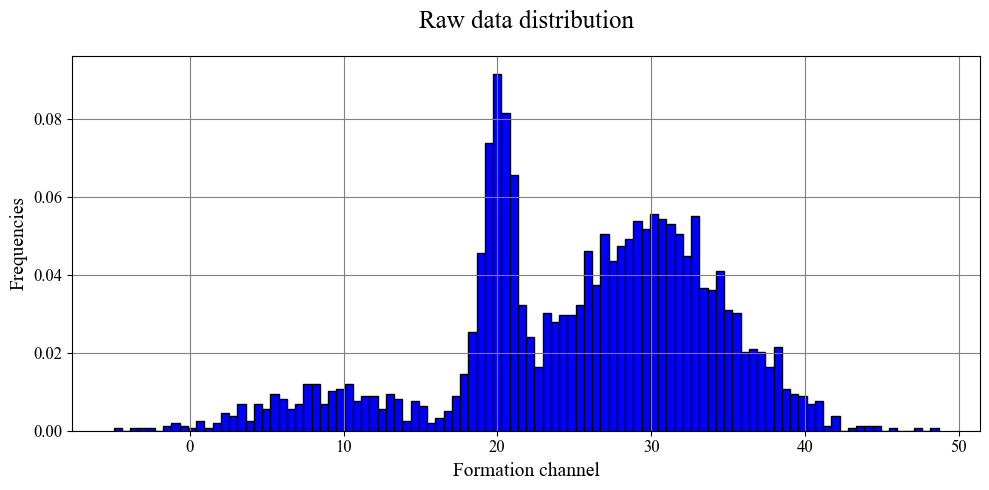

In [90]:
counts, bins ,_ = plt.hist(data, bins=100, density=True, histtype='barstacked', color='blue', edgecolor='black')
plt.title('Raw data distribution')
plt.xlabel('Formation channel')
plt.ylabel('Frequencies')

We can see clearly 3 peaks... Let's dive into a more quantitative approach

In [72]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [73]:
Gauss = GaussianMixture(3)

Separate data for training the GaussianMixture class instance and testing it

In [74]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [75]:
Gauss.fit(train)

GaussianMixture(n_components=3)

In [76]:
predicted_loglike = Gauss.score_samples(test)

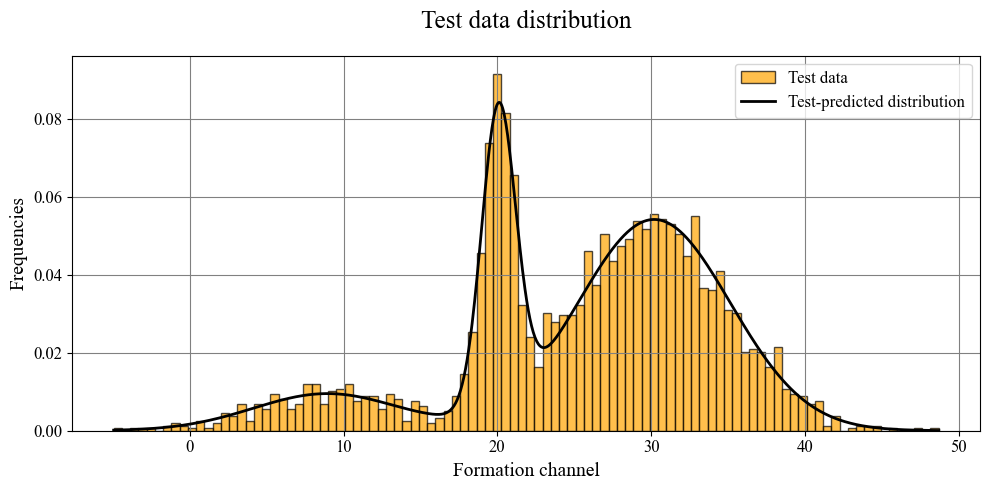

In [91]:
counts, bins ,_ = plt.hist(data, bins=100, density=True, histtype='barstacked', color='orange', alpha=0.7, edgecolor='black', label='Test data')
x_plot = np.linspace(min(data), max(data), 1000)
plt.plot(x_plot, np.exp(Gauss.score_samples(x_plot)), linewidth=2, color='black', label='Test-predicted distribution')
plt.title('Test data distribution')
plt.xlabel('Formation channel')
plt.ylabel('Frequencies')
plt.legend()

In [92]:
print(f'AIC value: {Gauss.aic(test):.2}')

AIC value: 4e+03


We'd like to see what happens changing as the number of gaussians changes from 0 to 10

In [108]:
Ns = np.linspace(2,10,8, dtype=int)

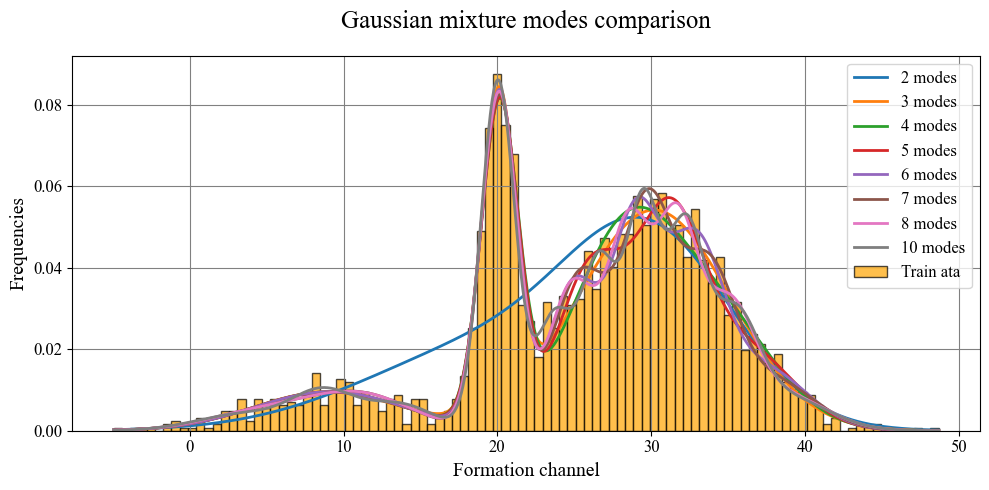

In [ ]:
AICs = []
for n in Ns:
    Gauss = GaussianMixture(int(n))
    Gauss.fit(train)
    predicted_loglike = Gauss.score_samples(train)
    AICs.append(Gauss.aic(test))
    plt.plot(x_plot, np.exp(Gauss.score_samples(x_plot)), linewidth=2, label=f'{n} modes')
counts, bins ,_ = plt.hist(train, bins=100, density=True, histtype='barstacked', color='orange', alpha=0.7, edgecolor='black', label='Train ata')
plt.title('Gaussian mixture modes comparison')
plt.xlabel('Formation channel')
plt.ylabel('Frequencies')
plt.legend()

Text(0.5, 1.0, 'AIC vs Number of gaussian modes')

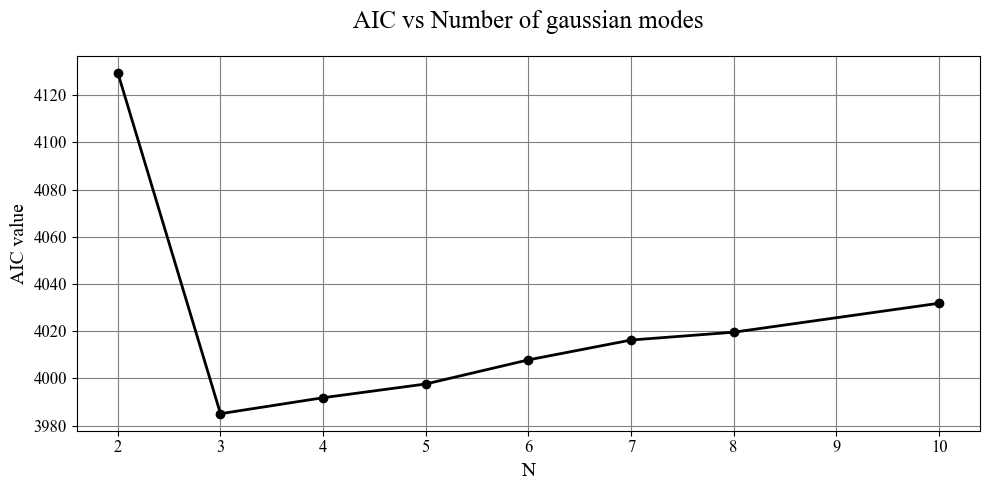

In [112]:
plt.plot(Ns, AICs, marker='o', color='black')
plt.xlabel('N')
plt.ylabel('AIC value')
plt.title('AIC vs Number of gaussian modes')